# Epoch time/lightcurve numpy dumps to debug

## Import modules

In [1]:
# IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/home/jovyan/work/src')
%set_env ucac4_path=/home/jovyan/work/support/ucac4/UCAC4
import do_charts_vast
import reading
import utils
from star_description import StarDescription

%matplotlib inline
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

env: ucac4_path=/home/jovyan/work/support/ucac4/UCAC4
found environ with ucac4 path /home/jovyan/work/support/ucac4/UCAC4


## Supporting functions

In [13]:
import glob

for py in glob.glob("../epoch_*")[:5]:
    print(py)

def get_filename(file_type):
    return f"../epoch_{file_type}_00174_phase.txt.npy"

t_np = np.load(get_filename('t'))
y_np = np.load(get_filename('y'))
t_np_zeroed = np.load(get_filename('tz'))
phased_t = np.load(get_filename('pt'))
phased_lc = np.load(get_filename('py'))


../epoch_t_SSS_J055839-1-303755_phase.txt.npy
../epoch_pt_RMH-2_phase.txt.npy
../epoch_y_SSS_J055931-1-305415_phase.txt.npy
../epoch_t_20196_phase.txt.npy
../epoch_lc_01510_phase.txt.npy


In [14]:
min_loc_y = np.argmin(y_np)
min_y = np.min(y_np)
assert y_np[min_loc_y] == min_y




690


Text(0, 0.5, 'y_np')

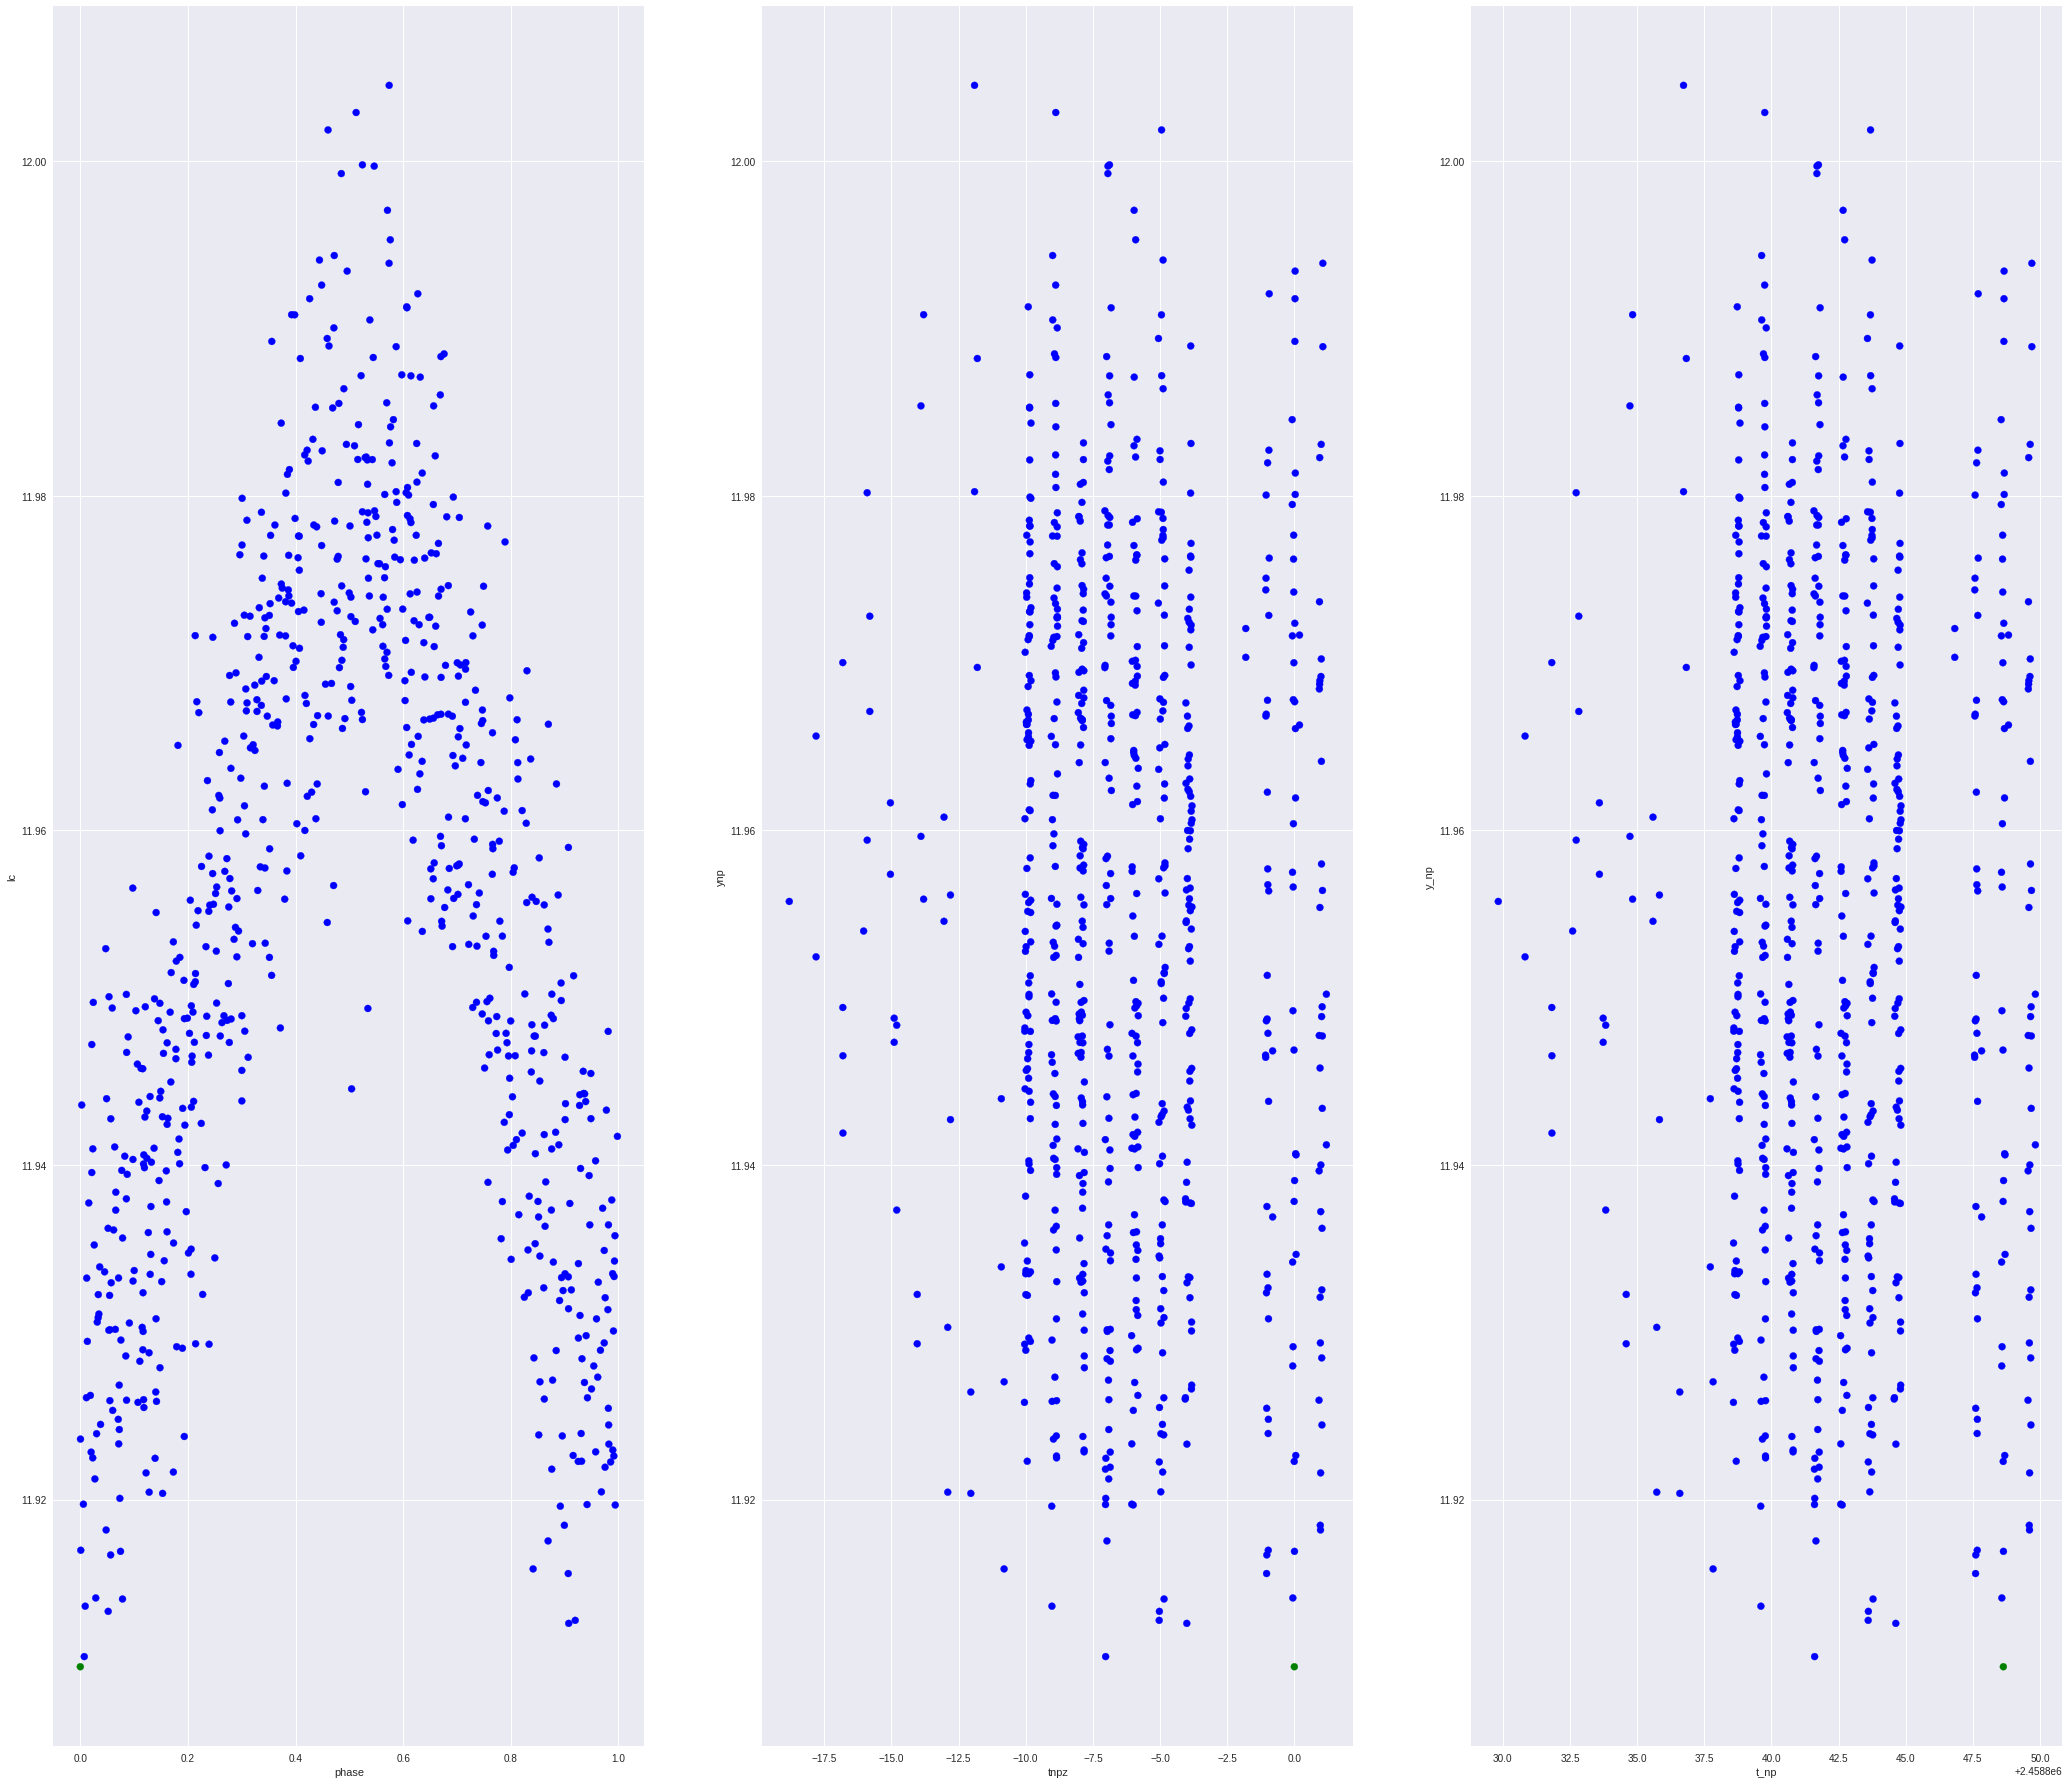

In [12]:
import matplotlib.pyplot as plt

def define_colors(normal_color, special_color, location, color_len):    
    colors = np.repeat(normal_color, color_len)
    colors[location] = special_color
    return colors


#plot 1:
location = np.argmin(y_np)
print(location)
colors = define_colors("b", "g", location, len(t_np))

fig_size = (36, 32)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=fig_size)

ax = ax1
ax.scatter(phased_t, phased_lc, color=colors)
ax.set_xlabel('phase')
ax.set_ylabel('lc')


#plot 2:

location = np.argmin(y_np)
colors = define_colors("b", "g", location, len(t_np))
ax = ax2
ax.scatter(t_np_zeroed, y_np, color=colors)
ax.set_xlabel('tnpz')
ax.set_ylabel('ynp')



location = np.argmin(y_np)
colors = define_colors("b", "g", location, len(t_np))
ax = ax3
ax.scatter(t_np, y_np, color=colors)
ax.set_xlabel('t_np')
ax.set_ylabel('y_np')


# here, set the width and the height between the subplots
# the default value is 0.2 for each
#plt.subplots_adjust(wspace=0.50, hspace=1.0)


In [7]:
def shift_to_epoch(epoch_value: float, t_np):
    """ shift the center of the array to the epoch"""
    if not epoch_value:
        return t_np
    assert isinstance(epoch_value, float)
    t_epoch_location = (np.abs(t_np - epoch_value)).argmin()
    print("epoch location is ", t_epoch_location)
    t_np_zeroed = t_np - t_np[t_epoch_location]
    print("the t_np zeroad on location is ", t_np_zeroed[t_epoch_location])
    return t_np_zeroed

len colors 735
location is 690, value at location is 2458848.631, min value is 2458829.8298
epoch location is  690
the t_np zeroad on location is  0.0


Text(0, 0.5, 'y_np')

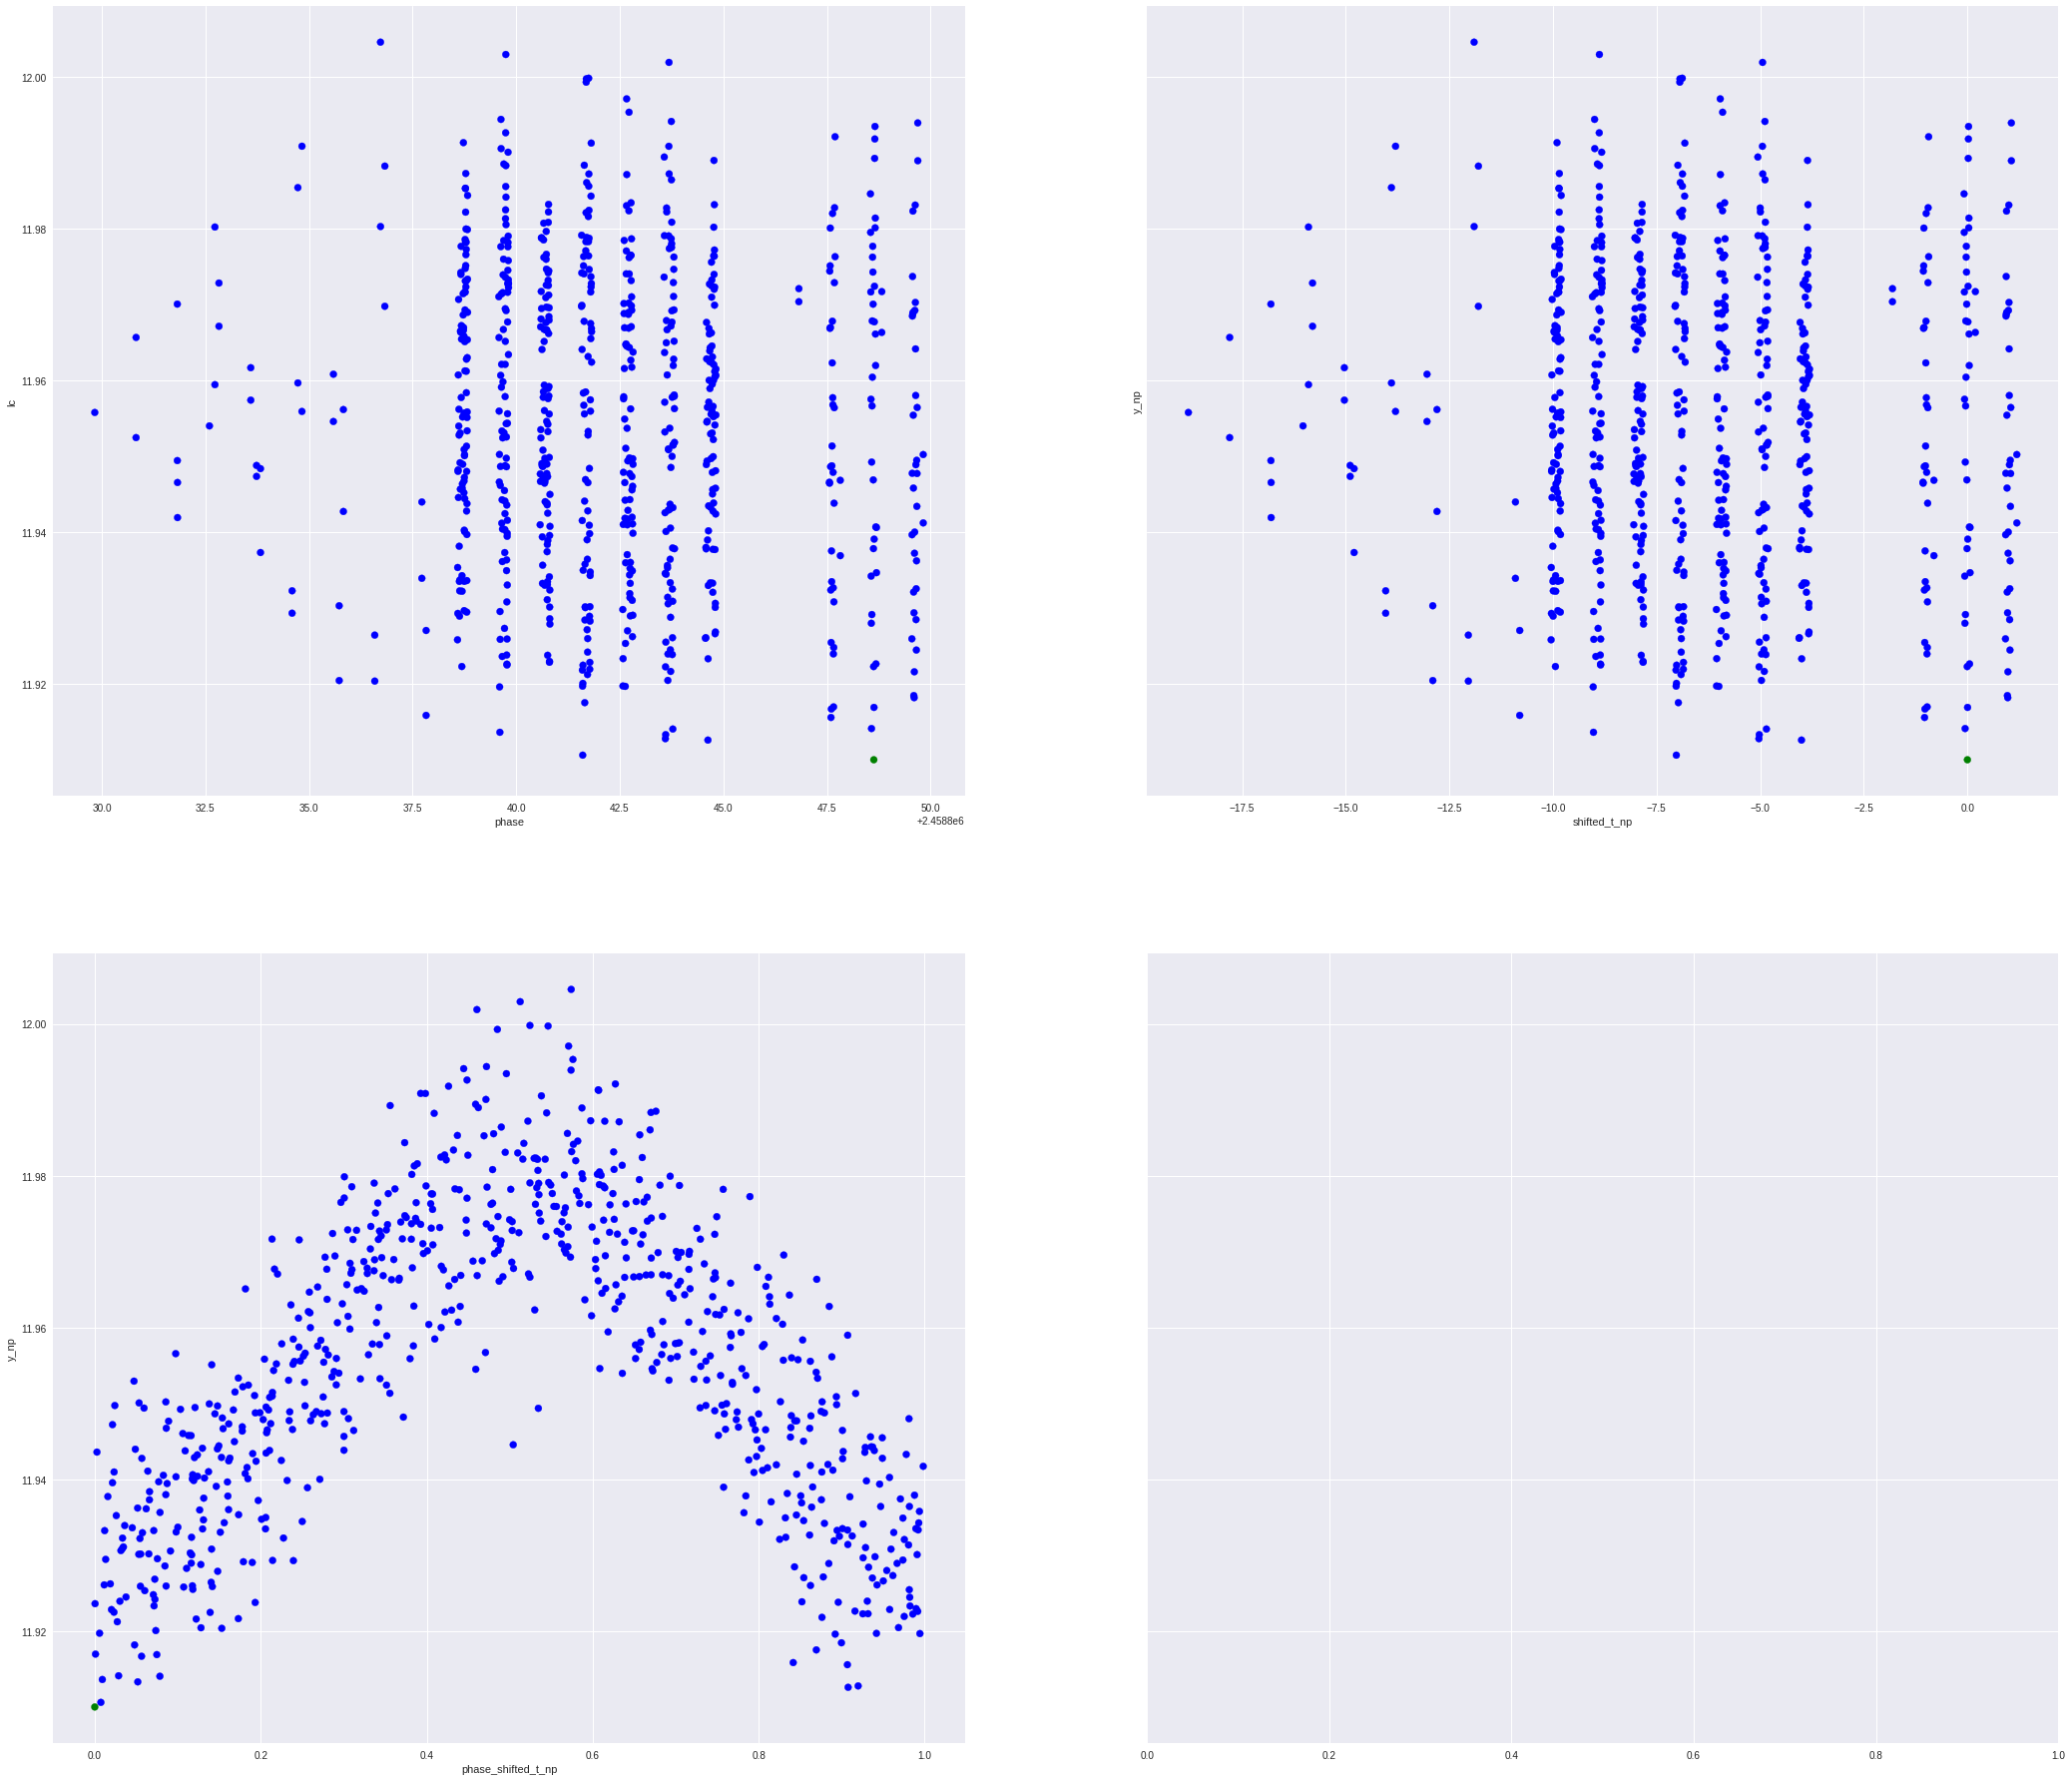

In [9]:
#plot 1:
location = np.argmin(phased_lc)
colors = define_colors("b", "g", location, len(t_np))
print("len colors", len(colors))

fig_size = (36, 32)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=fig_size)

ax = ax1
ax.scatter(t_np, y_np, color=colors)
ax.set_xlabel('phase')
ax.set_ylabel('lc')
print(f"location is {location}, value at location is {t_np[location]}, min value is {np.min(t_np)}")

location = t_np[np.argmin(y_np)]
shifted_t_np = shift_to_epoch(float(location), t_np)

ax = ax2
ax.scatter(shifted_t_np, y_np, color=colors)
ax.set_xlabel('shifted_t_np')
ax.set_ylabel('y_np')


phased_t = np.mod(shifted_t_np / 0.05712, 1)
ax = ax3
ax.scatter(phased_t, y_np[:], color=colors)
ax.set_xlabel('phase_shifted_t_np')
ax.set_ylabel('y_np')



In [10]:
t_np = np.load(get_filename('t'))
y_np = np.load(get_filename('y'))

epoch_float = float(t_np[np.argmin(y_np)])
t_np_zeroed = shift_to_epoch(epoch_float, t_np)
# calculate phase where epoch at t=0 will corresponsd to phase 0
phased_t = np.mod(t_np_zeroed / 0.05712, 1)
min_index_phased_t = np.argmin(phased_t)
print(f"value of minimum phase is {np.min(phased_t)}, {min_index_phased_t}, {phased_t[min_index_phased_t]}")
# print(f"all zeroes is {np.argwhere(phased_t == 0)}")
phased_lc = y_np[:]


epoch location is  690
the t_np zeroad on location is  0.0
value of minimum phase is 0.0, 690, 0.0


Text(0, 0.5, 'lc')

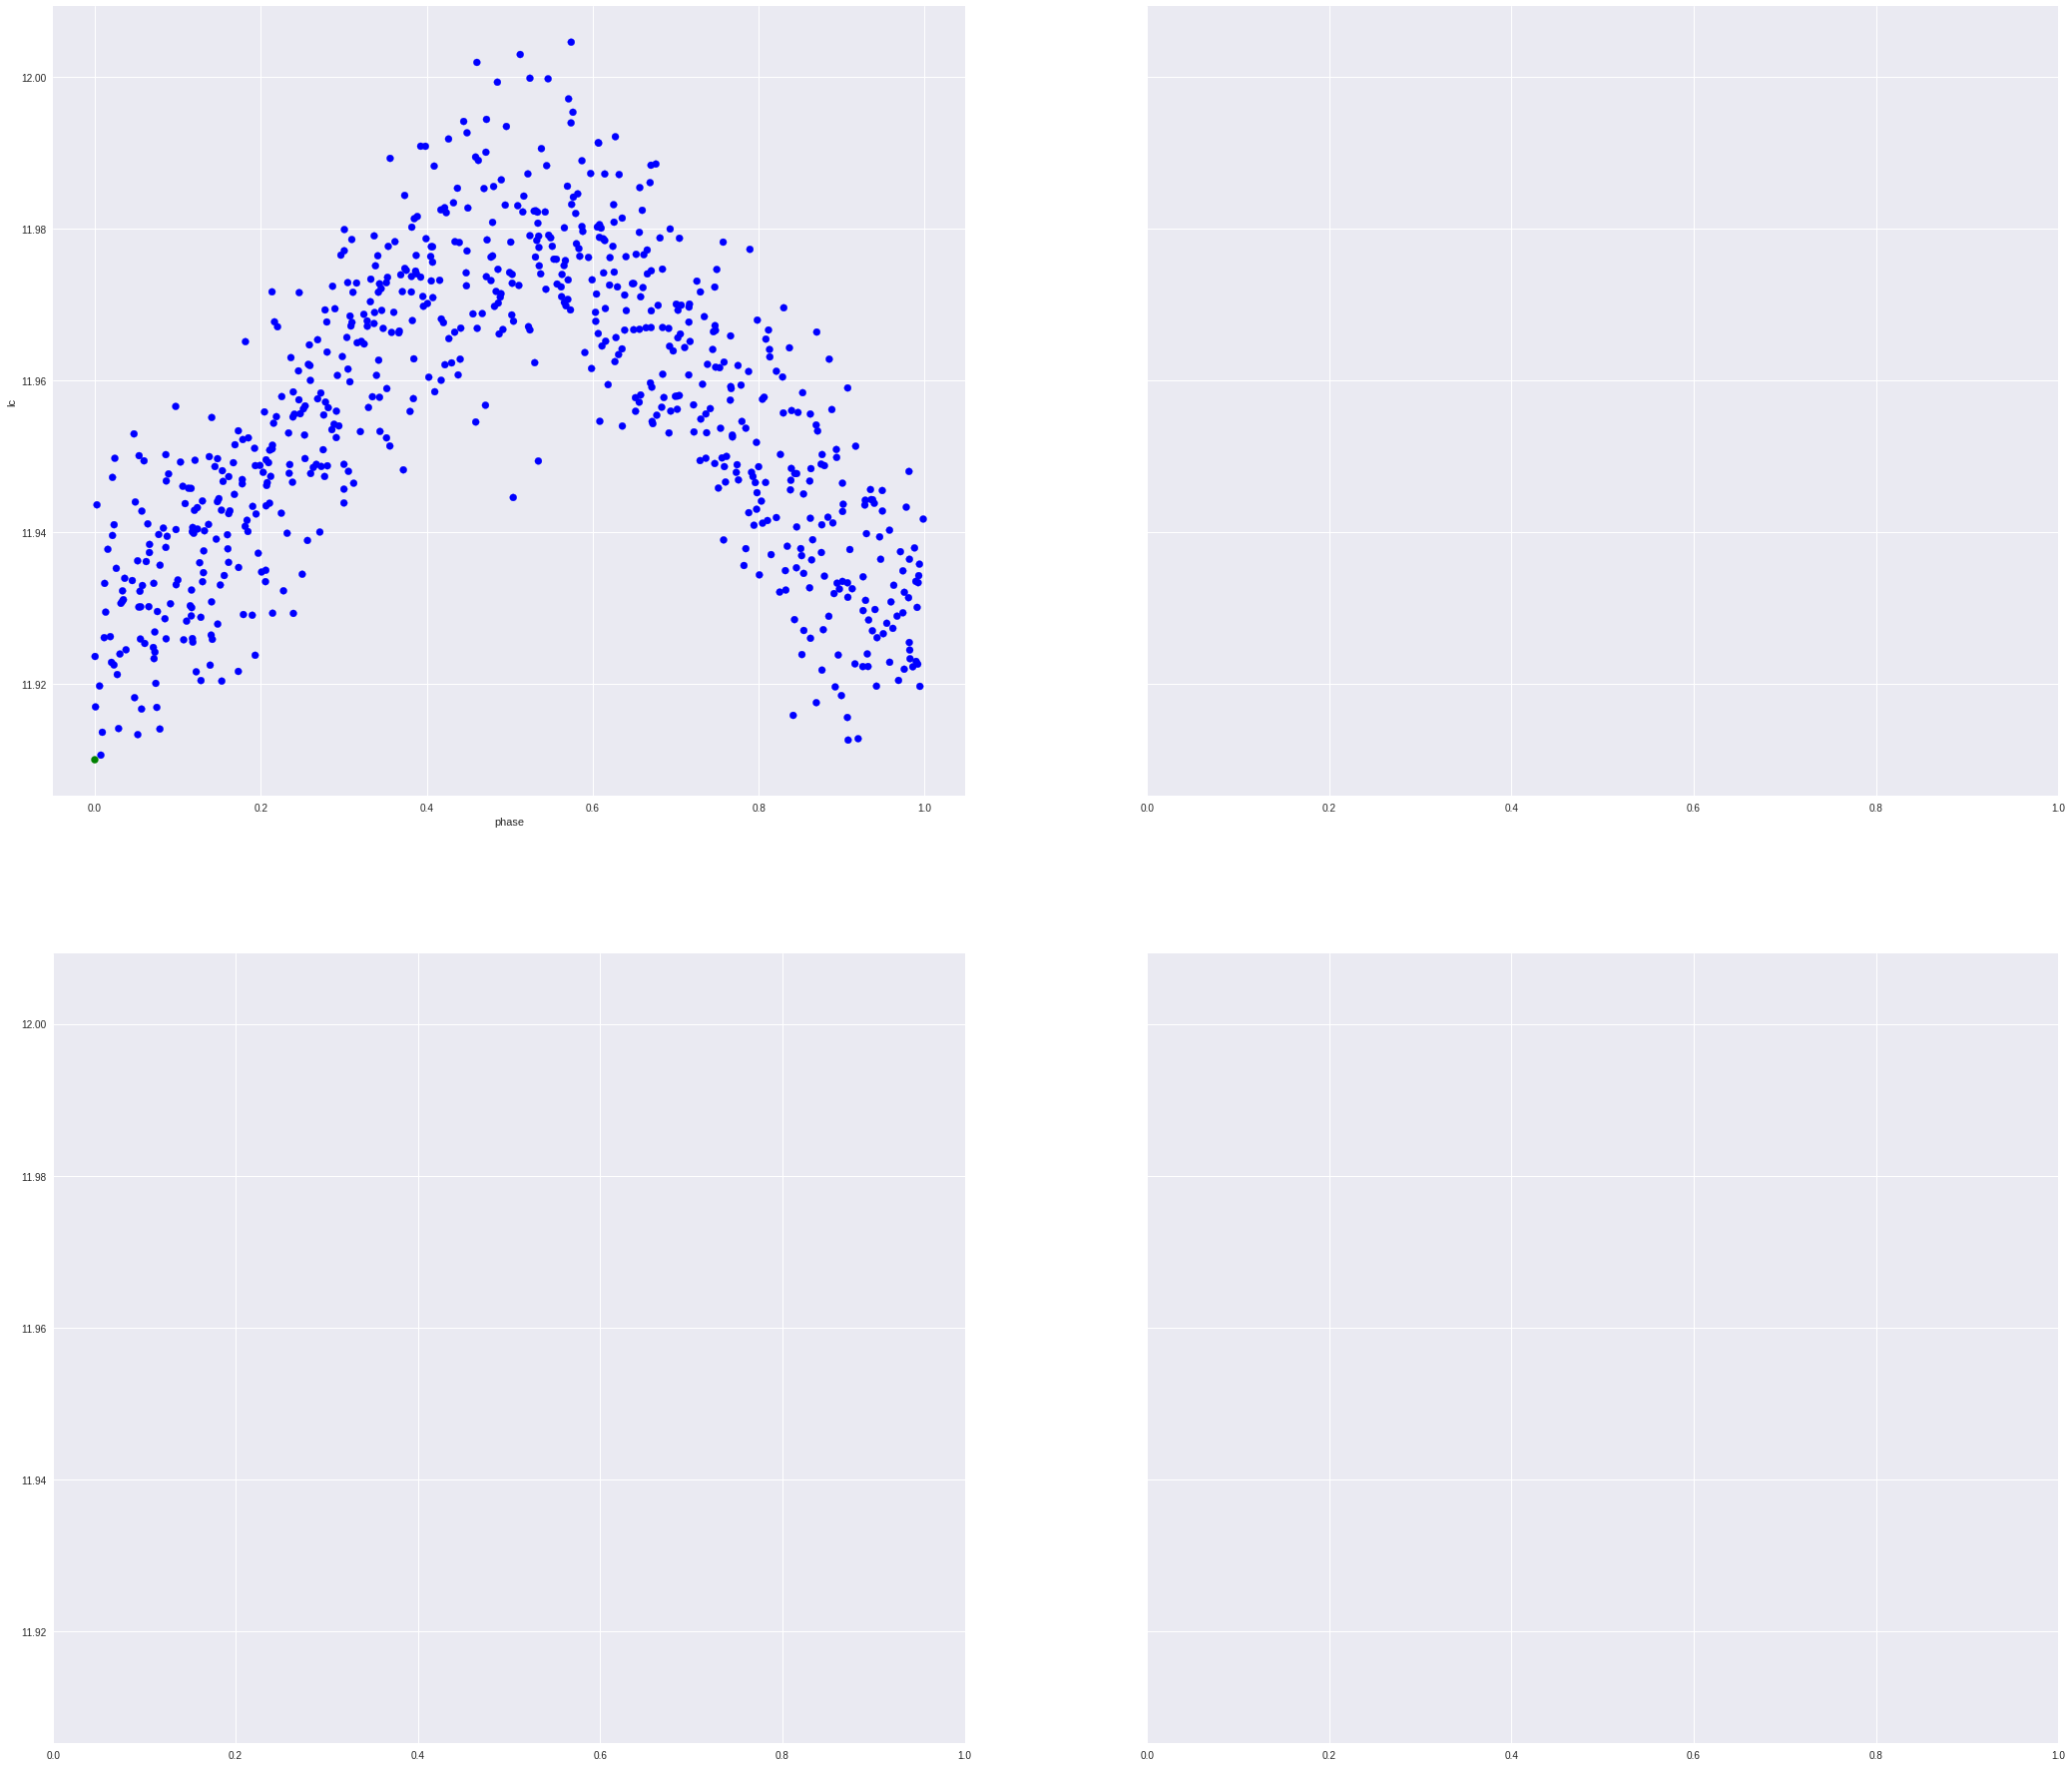

In [11]:
fig_size = (36, 32)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=fig_size)

ax = ax1
ax.scatter(phased_t, phased_lc, color=colors)
ax.set_xlabel('phase')
ax.set_ylabel('lc')